# __Final Project Sanbercode__

### __Pendahuluan__

#### __Tentang Organisasi__
HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.

#### __Objective__
Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.


#### __Permasalahan__
HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

#### __Penjelasan Kolom Fitur__
*   Negara : Nama negara
*   Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
*   Ekspor : Ekspor barang dan jasa perkapita
*   Kesehatan : Total pengeluaran kesehatan perkapita
*   Impor : Impor barang dan jasa perkapita
*   Pendapatan: Penghasilan bersih perorang
*   Inflasi : Pengukuran tingkat pertumbuhan tahunan dari Total GDP
*   Harapan_hidup : Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
*   Jumlah_fertiliti : Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
*   GDPperkapita : GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi.

 


 

### __Preparation__

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#### __Import Dataset__

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Portofolio/Data/Data_Negara_HELP.csv')

In [ ]:
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.shape

(167, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [ ]:
report(df)

,Column,d_type,unique_sample,n_uniques
0,Negara,object,"[Afghanistan, Albania, Algeria, Angola, Antigu...",167
1,Kematian_anak,float64,"[90.2, 16.6, 27.3, 119.0, 10.3]",139
2,Ekspor,float64,"[10.0, 28.0, 38.4, 62.3, 45.5]",147
3,Kesehatan,float64,"[7.58, 6.55, 4.17, 2.85, 6.03]",147
4,Impor,float64,"[44.9, 48.6, 31.4, 42.9, 58.9]",151
5,Pendapatan,int64,"[1610, 9930, 12900, 5900, 19100]",156
6,Inflasi,float64,"[9.44, 4.49, 16.1, 22.4, 1.44]",156
7,Harapan_hidup,float64,"[56.2, 76.3, 76.5, 60.1, 76.8]",127
8,Jumlah_fertiliti,float64,"[5.82, 1.65, 2.89, 6.16, 2.13]",138
9,GDPperkapita,int64,"[553, 4090, 4460, 3530, 12200]",157


### __Exploratory Data Analysis__

#### __Statistika Deskriptif__

In [ ]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


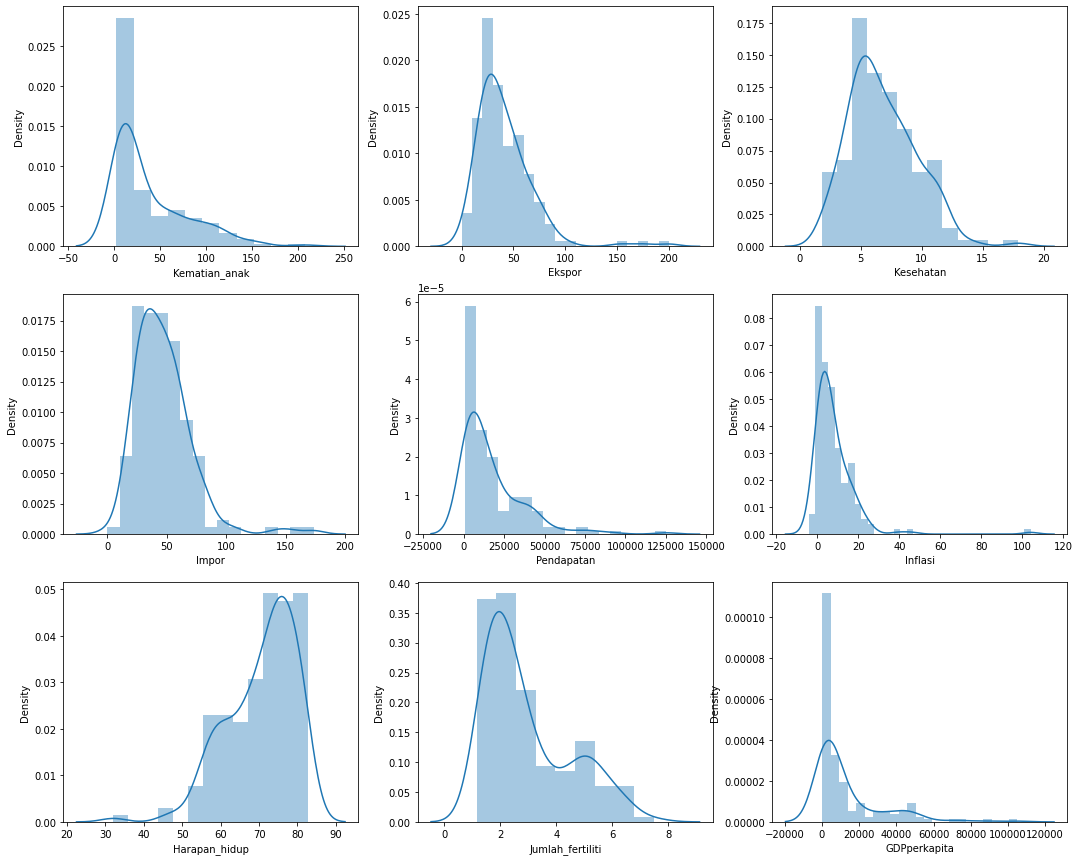

In [ ]:
plt.figure(figsize=(18,15))

for i in enumerate(df.describe().columns):
  plt.subplot(3, 3, i[0]+1)
  sns.distplot(df[i[1]])
plt.show()

#### __Negara Tertinggi dan Terendah menurut Inflasi__

In [ ]:
inflasi = df.sort_values('Inflasi', ascending=False)
inflasi

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.000,60.5,5.84,2330
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.900,75.4,2.47,13500
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.500,71.1,6.23,3600
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100
...,...,...,...,...,...,...,...,...,...,...
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700


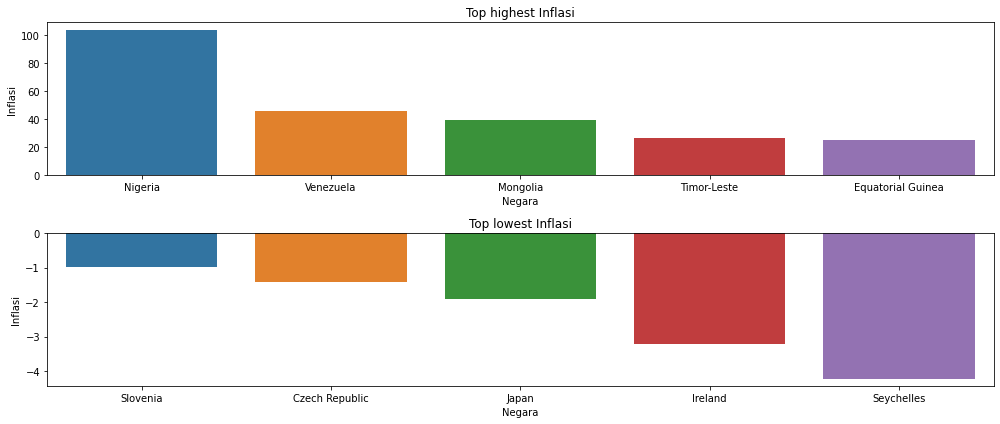

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(x=inflasi.Negara.head(), y=inflasi.Inflasi.head())
plt.title('Top highest Inflasi')

plt.subplot(2,1,2)
sns.barplot(x=inflasi.Negara.tail(), y=inflasi.Inflasi.tail())
plt.title('Top lowest Inflasi')

plt.tight_layout()
plt.show()

#### __Negara Tertinggi dan Terendah menurut Harapan Hidup__

In [ ]:
harapan_hidup = df.sort_values('Harapan_hidup', ascending=False)
harapan_hidup

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
...,...,...,...,...,...,...,...,...,...,...
94,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459
166,Zambia,83.1,37.0,5.89,30.9,3280,14.000,52.0,5.40,1460
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170


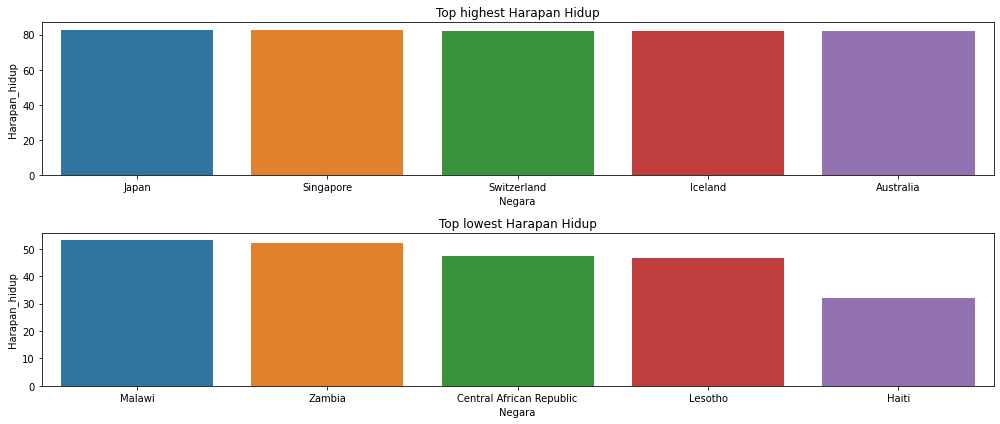

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(x=harapan_hidup.Negara.head(), y=harapan_hidup.Harapan_hidup.head())
plt.title('Top highest Harapan Hidup')

plt.subplot(2,1,2)
sns.barplot(x=harapan_hidup.Negara.tail(), y=harapan_hidup.Harapan_hidup.tail())
plt.title('Top lowest Harapan Hidup')

plt.tight_layout()
plt.show()

#### __Negara Tertinggi dan Terendah menurut Kesehatan__

In [ ]:
kesehatan = df.sort_values('Kesehatan', ascending=False)
kesehatan

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
159,United States,7.3,12.400,17.90,15.8000,49400,1.220,78.7,1.93,48400
101,"Micronesia, Fed. Sts.",40.0,23.500,14.20,81.0000,3340,3.800,65.4,3.46,2860
132,Sierra Leone,160.0,16.800,13.10,34.5000,1220,17.200,55.0,5.20,399
110,Netherlands,4.5,72.000,11.90,63.6000,45500,0.848,80.7,1.79,50300
54,France,4.2,26.800,11.90,28.1000,36900,1.050,81.4,2.03,40600
...,...,...,...,...,...,...,...,...,...,...
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.310,67.9,2.83,4440
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.700,60.4,4.95,2740
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.900,65.3,3.85,1040
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.040,66.8,2.41,988


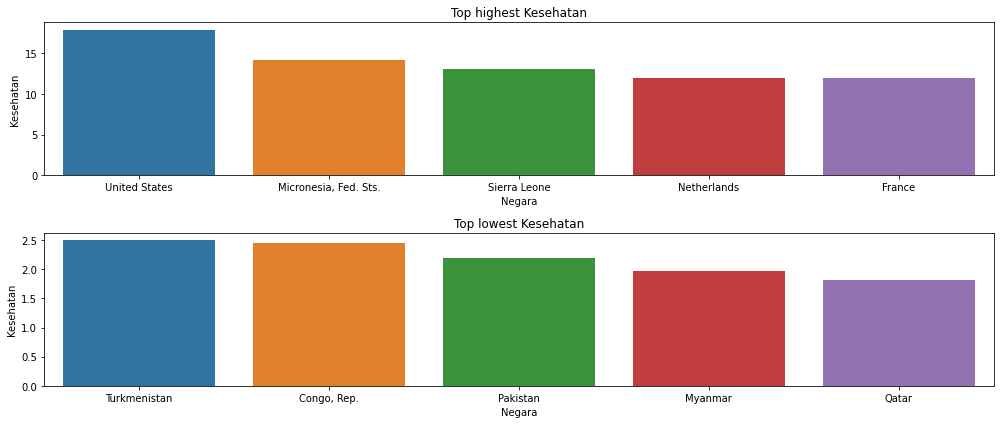

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(x=kesehatan.Negara.head(), y=kesehatan.Kesehatan.head())
plt.title('Top highest Kesehatan')

plt.subplot(2,1,2)
sns.barplot(x=kesehatan.Negara.tail(), y=kesehatan.Kesehatan.tail())
plt.title('Top lowest Kesehatan')

plt.tight_layout()
plt.show()

#### __Korelasi antar Variabel__

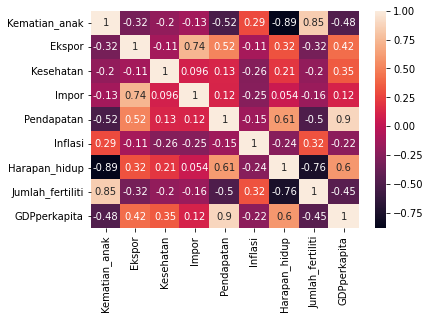

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2g');

### __Data Cleansing__

#### __Handling Outliers__

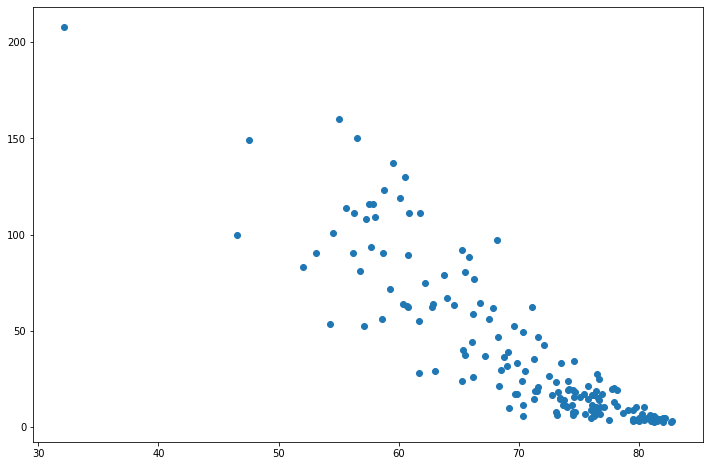

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['Harapan_hidup'], df['Kematian_anak'])
plt.show()

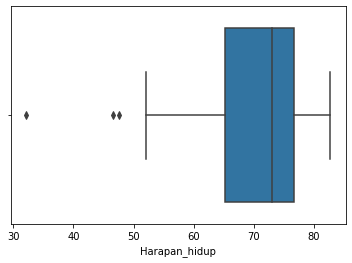

In [ ]:
sns.boxplot('Harapan_hidup', data=df)

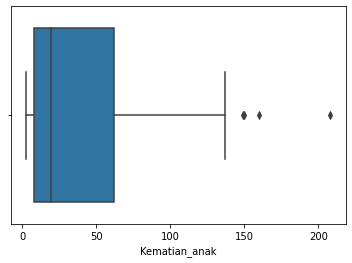

In [ ]:
sns.boxplot('Kematian_anak', data=df)

In [ ]:
def finding_outlier(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3 - q1
  df_hasil = df[~((df < (q1-1.5*iqr)) | (df > (q3+1.5*iqr)))]
  return df_hasil

In [ ]:
print(finding_outlier(df['Harapan_hidup']))
print(finding_outlier(df['Kematian_anak']))

31    47.5
66    32.1
87    46.5
Name: Harapan_hidup, dtype: float64
31     149.0
32     150.0
66     208.0
132    160.0
Name: Kematian_anak, dtype: float64


In [ ]:
def remove_outlier(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3 - q1
  df_hasil = df[~((df < (q1-1.5*iqr)) | (df > (q3+1.5*iqr)))]
  return df_hasil

In [ ]:
df_remove = remove_outlier(df[['Harapan_hidup','Kematian_anak']])
df_remove.dropna(axis=0, inplace=True)
df_remove

,Harapan_hidup,Kematian_anak
0,56.2,90.2
1,76.3,16.6
2,76.5,27.3
3,60.1,119.0
4,76.8,10.3
...,...,...
162,63.0,29.2
163,75.4,17.1
164,73.1,23.3
165,67.5,56.3


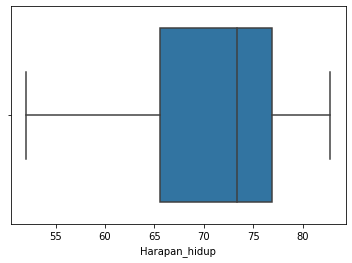

In [ ]:
sns.boxplot('Harapan_hidup', data=df_remove)

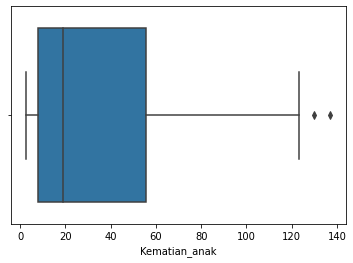

In [ ]:
sns.boxplot('Kematian_anak', data=df_remove)

In [ ]:
def remove_outlier2(df):
  q1 = df_remove.quantile(0.25)
  q3 = df_remove.quantile(0.75)
  iqr = q3 - q1
  df_hasil = df[~((df < (q1-1.5*iqr)) | (df > (q3+1.5*iqr)))]
  return df_hasil

In [ ]:
df_remove2 = remove_outlier2(df_remove[['Harapan_hidup','Kematian_anak']])
df_remove2.dropna(axis=0, inplace=True)
df_remove2

,Harapan_hidup,Kematian_anak
0,56.2,90.2
1,76.3,16.6
2,76.5,27.3
3,60.1,119.0
4,76.8,10.3
...,...,...
162,63.0,29.2
163,75.4,17.1
164,73.1,23.3
165,67.5,56.3


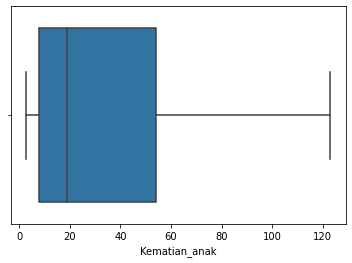

In [ ]:
sns.boxplot('Kematian_anak', data=df_remove2)

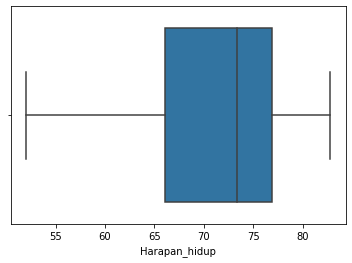

In [ ]:
sns.boxplot('Harapan_hidup', data=df_remove2)

### __Pemodelan Machine Learning__

#### __Normalisasi Data__

In [ ]:
sc = StandardScaler()
df_std = sc.fit_transform(df_remove2.astype(float))

In [ ]:
print(df_std.shape)
print(df_remove2.shape)

(160, 2)
(160, 2)


In [ ]:
df2 = pd.DataFrame(df_std, index = df_remove2.index, columns=df_remove2.columns[:2])
df2

,Harapan_hidup,Kematian_anak
0,-1.947058,1.709991
1,0.626400,-0.509044
2,0.652007,-0.186440
3,-1.447730,2.578309
4,0.690417,-0.698989
...,...,...
162,-1.076435,-0.129155
163,0.511171,-0.493969
164,0.216695,-0.307039
165,-0.500288,0.687908


#### __Elbow Method__

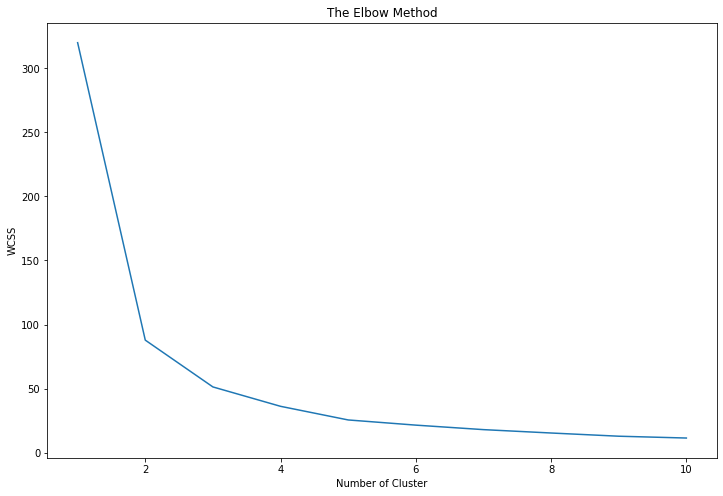

In [ ]:
plt.figure(figsize=(12,8))
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df2)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans1 = KMeans(n_clusters=3).fit(df2)
labels1 = kmeans1.labels_

In [ ]:
new_df = pd.DataFrame(data=df2, columns=['Harapan_hidup','Kematian_anak'])
new_df['Clustering'] = labels1

#### __Visualisasi Clustering__

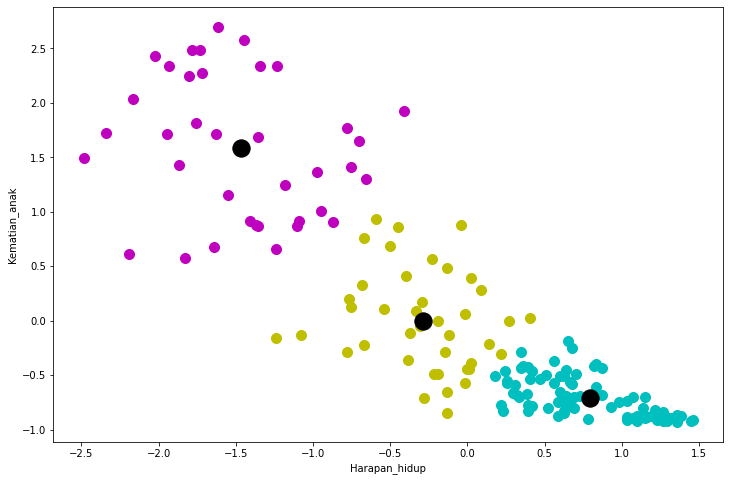

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(new_df.Harapan_hidup[new_df.Clustering == 0], new_df['Kematian_anak'][new_df.Clustering == 0], c='c', s=100)
plt.scatter(new_df.Harapan_hidup[new_df.Clustering == 1], new_df['Kematian_anak'][new_df.Clustering == 1], c='m', s=100)
plt.scatter(new_df.Harapan_hidup[new_df.Clustering == 2], new_df['Kematian_anak'][new_df.Clustering == 2], c='y', s=100)

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], c='k', s=300)

plt.xlabel('Harapan_hidup')
plt.ylabel('Kematian_anak')

plt.show()

#### __Skoring antar Centroid__

In [ ]:
print(silhouette_score(df2, labels= labels1))

0.512330609834295


In [ ]:
new_df

,Harapan_hidup,Kematian_anak,Clustering
0,-1.947058,1.709991,1
1,0.626400,-0.509044,0
2,0.652007,-0.186440,0
3,-1.447730,2.578309,1
4,0.690417,-0.698989,0
...,...,...,...
162,-1.076435,-0.129155,2
163,0.511171,-0.493969,0
164,0.216695,-0.307039,2
165,-0.500288,0.687908,2


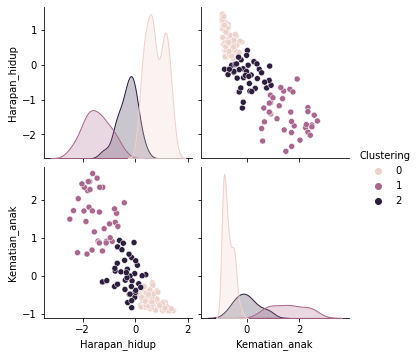

In [ ]:
sns.pairplot(new_df, hue='Clustering')